####Download Dataset dari Kaggle

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download muratkokludataset/rice-image-dataset
! unzip rice-image-dataset.zip -d flowers

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: flowers/Rice_Image_Dataset/Karacadag/Karacadag (551).jp

In [ ]:
# Library  atur lokasi dataset
import os

# Library machine learning Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Library u/  upload file gcolabs dan plot
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# Mengatur Lokasi dataset yang akan digunakan
dir_base = "/content/flowers/Rice_Image_Dataset"
dir_arbario = os.path.join("/content/flowers/Rice_Image_Dataset/Arborio")
dir_basmati = os.path.join("/content/flowers/Rice_Image_Dataset/Basmati")
dir_ispala = os.path.join("/content/flowers/Rice_Image_Dataset/Ipsala")
dir_jasmine = os.path.join("/content/flowers/Rice_Image_Dataset/Jasmine")
dir_karacadag = os.path.join("/content/flowers/Rice_Image_Dataset/Karacadag")

In [ ]:
os.listdir('/content/flowers/Rice_Image_Dataset')

['Rice_Citation_Request.txt',
 'Basmati',
 'Arborio',
 'Ipsala',
 'Jasmine',
 'Karacadag']

In [ ]:
# Melihat jumlah data 
arbario = len(os.listdir(dir_arbario))
basmati = len(os.listdir(dir_basmati))
ispala = len(os.listdir(dir_ispala))
jasmine = len(os.listdir(dir_jasmine))
karacadag  = len(os.listdir(dir_karacadag))

print("Total Arbario     : ",arbario)
print("Total Basmati     : ",basmati)
print("Total Ispala      : ",ispala)
print("Total Jasmine     : ",jasmine)
print("Total Karacadag   : ",karacadag)

Total Daisy     :  15000
Total Dandelion      :  15000
Total Rose   :  15000
Total Sunflower   :  15000
Total Tulip   :  15000


In [ ]:
#membuat training dan validation data
#Ukuran validation set sebesar 40%
val_data = 0.2

#image generator untuk membuat data training dan validation
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = val_data
)

validation_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = val_data
)

In [ ]:
# Train dan Validation generator dengan mode categorical
batch_size = 128
img_height, img_width = 150,150
input_shape = (img_height, img_width, 3)

train_generator = train_datagen.flow_from_directory(
    dir_base,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = True,
    subset = "training"
)

validation_generator = validation_datagen.flow_from_directory(
    dir_base,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = False,
    subset = "validation"
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


####Model

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 37, 37, 64)       

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, 
                     steps_per_epoch=25,
                     epochs = 15, 
                     validation_data = validation_generator, 
                     callbacks=[callbacks])

Epoch 1/15
25/25 [==============================] - 492s 20s/step - loss: 0.0985 - accuracy: 0.9672 - val_loss: 0.0954 - val_accuracy: 0.9665
Epoch 2/15
25/25 [==============================] - 490s 20s/step - loss: 0.0913 - accuracy: 0.9716 - val_loss: 0.0843 - val_accuracy: 0.9707
Epoch 3/15
25/25 [==============================] - 488s 20s/step - loss: 0.1057 - accuracy: 0.9625 - val_loss: 0.0870 - val_accuracy: 0.9709
Epoch 4/15
25/25 [==============================] - 487s 20s/step - loss: 0.1132 - accuracy: 0.9644 - val_loss: 0.0947 - val_accuracy: 0.9695
Epoch 5/15
25/25 [==============================] - 481s 20s/step - loss: 0.1156 - accuracy: 0.9606 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 6/15
25/25 [==============================] - 482s 20s/step - loss: 0.1100 - accuracy: 0.9606 - val_loss: 0.0953 - val_accuracy: 0.9699
Epoch 7/15
25/25 [==============================] - 488s 20s/step - loss: 0.1051 - accuracy: 0.9644 - val_loss: 0.0950 - val_accuracy: 0.9709
Epoch 

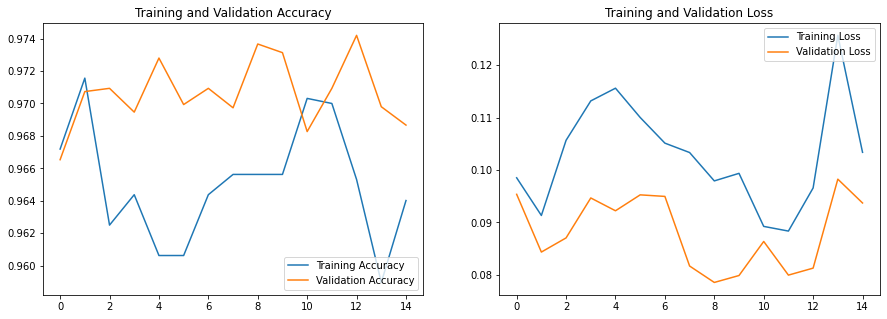

In [ ]:
#plotiing accuracy dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

####Saving Model dan Deployment

In [ ]:
model.save_weights('model_weights.h5')
model.save('model.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root 285115728 Nov 26 07:10 model.h5
-rw-r--r-- 1 root root  95023348 Nov 26 07:11 model.tflite
-rw-r--r-- 1 root root  95048480 Nov 26 07:10 model_weights.h5


####Prediksi Data

In [ ]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 150, 150, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  prod = ['arbario',
          'basmati',
          'ispala',
          'jasmine',
          'karacadag']
  df['Product'] = prod
  df = df[['Product', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_product = 'Arabio'
  elif predict_label == 1:
      predict_product = 'Basmati'
  elif predict_label == 2:
      predict_product = 'Ispala'
  elif predict_label == 3:
      predict_product = 'Jasmine'
  else:
      predict_product = 'Karacadag'

  return predict_product, df

In [ ]:
def predict():
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img = np.vstack([x])

  label, df = predict_image(img)

  print('\n')
  plt.show()
  print("\nThe image is detected as " + label)
  print('\n')
  print(df)
  print('\n')

Saving 2.jpg to 2 (1).jpg
1/1 [==============================] - 0s 50ms/step




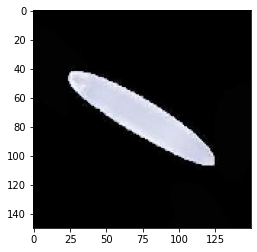


The image is detected as Basmati


     Product   Probability
0    arbario  1.819299e-13
1    basmati  9.995198e-01
2     ispala  1.080138e-13
3    jasmine  4.801233e-04
4  karacadag  9.969451e-17




In [ ]:
predict()